## All the techniques of handling missing values

* CCA (Complete Case analysis)
* Mean/ median/(For numerical data)
* Arbitrary imputation
* Random sample imputation(For both numerical & categorical data)
* Capturing NaN value with a new feature
* End of distribution imputation
* Most Frequent categories imputation (Mode)


# Complete Case Analysis
Complete case analysis, also known as listwise deletion (LD), utilizes only the cases in a data set for which there are no missing values on any of the variables. ... When data are MCAR, the complete cases form a random subsample from the population, thus the estimates obtained will not be biased.

* Complete Case analysis (CCA) also called "list wise deletion" of cases, consists in decarding observations(rows)
 where values in any of the variable (column) are missing.
* Complete case analysis literally means,analyzing only those observations for which there is information in all of the variables in the dataset.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets/datascience_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [3]:
df.isnull().mean().sort_values(ascending=False)*100

company_type              32.049274
company_size              30.994885
gender                    23.530640
major_discipline          14.683161
training_hours             3.998330
city_development_index     2.500261
education_level            2.401086
enrolled_university        2.014824
experience                 0.339284
enrollee_id                0.000000
city                       0.000000
relevent_experience        0.000000
target                     0.000000
dtype: float64

In [4]:
df.shape

(19158, 13)

In [5]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [6]:
df[cols].shape

(19158, 5)

In [7]:
df[cols].dropna().shape

(17182, 5)

In [8]:
len(df[cols].dropna())/len(df[cols])

0.8968577095730244

In [9]:
new_df = df[cols].dropna()

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17182 entries, 0 to 19157
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  17182 non-null  float64
 1   enrolled_university     17182 non-null  object 
 2   education_level         17182 non-null  object 
 3   experience              17182 non-null  float64
 4   training_hours          17182 non-null  float64
dtypes: float64(3), object(2)
memory usage: 805.4+ KB


### Numerical

In [11]:
def hist_plot(df,df2, feature):
    plt.figure(figsize=(6,2))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    df[feature].hist(bins=50, density=True, color='r')
    #plt.title(feature+" Before CCA")
    
   # plt.subplot(122)
    df2[feature].hist(bins=50, ax=ax, color='gray', density=True)
    #df2[feature].plot(kind='hist', color='g')
    #plt.title(feature+" After CCA")
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 600x200 with 0 Axes>

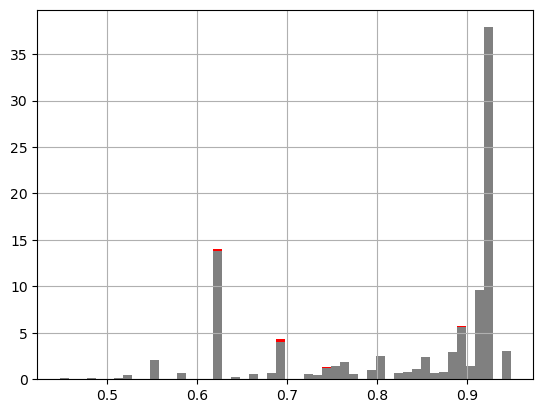

In [12]:
hist_plot(df, new_df, 'city_development_index')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 600x200 with 0 Axes>

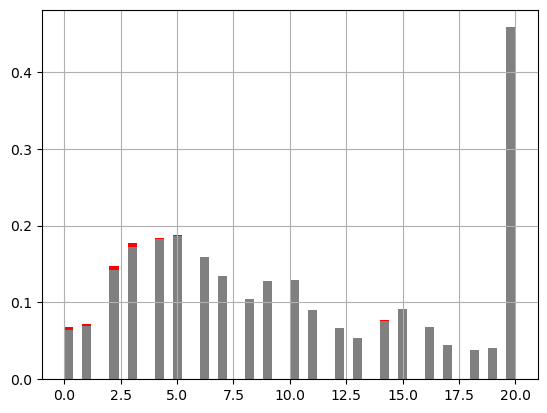

In [13]:
hist_plot(df, new_df, 'experience')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 600x200 with 0 Axes>

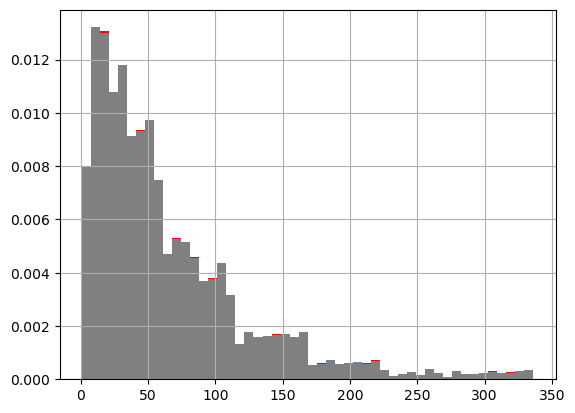

In [14]:
hist_plot(df, new_df, 'training_hours')

<IPython.core.display.Javascript object>

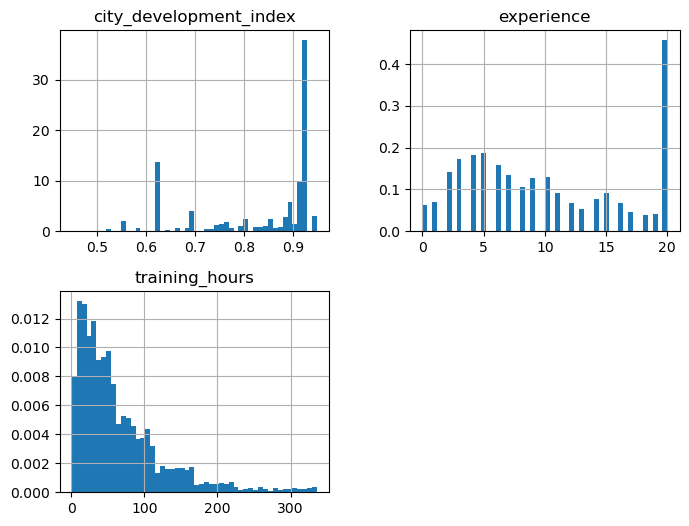

In [15]:
new_df.hist(bins=50, density=True, figsize=(8, 6))
plt.show()

In [16]:
def hist_plot(df,df2, feature):
    plt.figure(figsize=(6,3))
    #plt.subplot(121)
    sns.distplot(df[feature], color='r', hist=False)
    #plt.title(feature+" Before CCA")
    
   # plt.subplot(122)
    sns.distplot(new_df[feature], color='y', hist=False)
    #plt.title(feature+" After CCA")
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

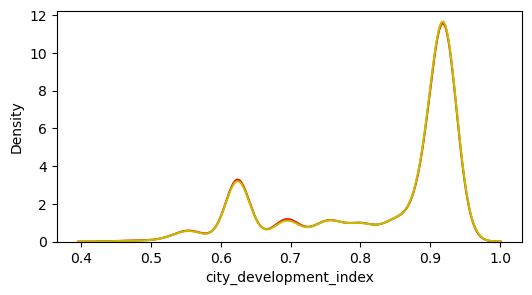

In [17]:
hist_plot(df, new_df, 'city_development_index')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

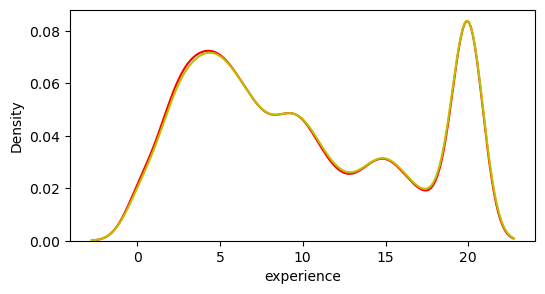

In [18]:
hist_plot(df, new_df, 'experience')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

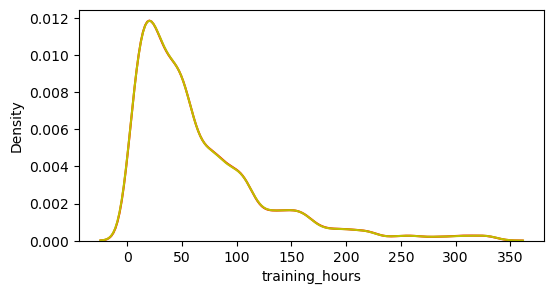

In [19]:
hist_plot(df, new_df, 'training_hours')

***As we see in above plots that there is not so much difference among actual and deleted dataset so it's means that the Data is missing completely at random (MCAR)***

### Categorical

In [20]:
new_df['education_level'].value_counts()

Graduate          10650
Masters            4022
High School        1845
Phd                 380
Primary School      285
Name: education_level, dtype: int64

In [21]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17182 entries, 0 to 19157
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  17182 non-null  float64
 1   enrolled_university     17182 non-null  object 
 2   education_level         17182 non-null  object 
 3   experience              17182 non-null  float64
 4   training_hours          17182 non-null  float64
dtypes: float64(3), object(2)
memory usage: 805.4+ KB


In [22]:
temp = pd.concat([
    
    # percentage of observations per category of original data
    df['enrolled_university'].value_counts()/len(df),
    # percentage of observations per category of cca data
    new_df['enrolled_university'].value_counts()/len(new_df)
    
], axis=1)

temp.columns = ['riginal','cca']

In [23]:
temp

,riginal,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [24]:
temp2 = pd.concat([
    
    # percentage of observations per category of original data
    df['education_level'].value_counts()/len(df),
    new_df['education_level'].value_counts()/len(new_df)
],
    axis=1)

temp2.columns = ['original','cca']

In [25]:
temp2

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


***As we can see that the ratio among original and cca observation categories are nearly same so we can apply the CCA in these variables***

## Advantage

* Easy to implement as no data manipulation is required
* Preserves variables distributions  (If data is MCAR, then the distribution of the variables of the reduced data set should match the distribution in the original data set)

## Disadvantage

* It can exclude a large amount of the original dataset  (if missing data is abundant).
* Excludive observations (rows) could be informative for the analysis (if the data is not missing completely at random (MCAR)).
* and a serious problem is that when using our model in production, the model will not know how to handle missing data.